#week 1

Data exploration and preprocessing

In [119]:
# importing  necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
# loading the dataset

df = pd.read_csv('/content/dsa_job - data_science_job.csv')
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,Machine Learning Engineer in office,Analysis,EUR,186597,136086,US,MI,CT,Remote,DE,L
1,2020,Statistician (Remote),ML/AI,JPY,110630,67982,JP,EX,FL,Remote,IN,M
2,2022,Machine Learning Engineer,ML/AI,INR,61280,153309,UK,MI,CT,Hybrid,CN,L
3,2022,Data Analyst in office,ML/AI,JPY,154130,135242,DE,SE,FT,Hybrid,MX,L
4,2020,Statistician,Data Science,EUR,172312,35156,UK,MI,FT,In-person,UK,S
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2020,Machine Learning Engineer (Remote),NaN,NaN,179769,179111,UK,NaN,CT,In-person,IN,NaN
4996,2021,Machine Learning Engineer (Remote),NaN,NaN,184642,196373,CN,NaN,FL,Remote,UK,NaN
4997,2022,Machine Learning Engineer,Analysis,GBP,135319,51366,UK,EN,FL,Hybrid,JP,M
4998,2021,Statistician,Data Science,EUR,58037,181817,US,MI,PT,Remote,DE,S


In [ ]:
df.shape

(5000, 12)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   job_title           5000 non-null   object
 2   job_category        4500 non-null   object
 3   salary_currency     4500 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_in_usd       5000 non-null   int64 
 6   employee_residence  5000 non-null   object
 7   experience_level    4500 non-null   object
 8   employment_type     5000 non-null   object
 9   work_setting        5000 non-null   object
 10  company_location    5000 non-null   object
 11  company_size        4500 non-null   object
dtypes: int64(3), object(9)
memory usage: 468.9+ KB


In [121]:
df.describe()

,work_year,salary,salary_in_usd
count,5000.00000,5000.000000,5000.000000
mean,2020.97680,102046.307200,114076.995800
std,0.81951,70853.626492,49113.807687
min,2020.00000,-198754.000000,30016.000000
25%,2020.00000,64295.500000,71343.750000
50%,2021.00000,110636.000000,114167.000000
75%,2022.00000,153104.750000,156665.750000
max,2022.00000,199924.000000,199985.000000


In [122]:
#detecting missing values
df.isnull().sum()

,0
work_year,0
job_title,0
job_category,500
salary_currency,500
salary,0
salary_in_usd,0
employee_residence,0
experience_level,500
employment_type,0
work_setting,0


In [123]:
# handling missing values
# imputing

df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
df['salary_currency'].fillna(df['salary_currency'].mode()[0],inplace=True)
df['experience_level'].fillna(df['experience_level'].mode()[0],inplace=True)
df['company_size'].fillna(df['company_size'].mode()[0],inplace=True)
df.dropna(subset=['salary_in_usd'], inplace=True)  # Drop rows with missing target variable

df.isnull().sum()

<ipython-input-123-30fe0f37ab6c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_category'].fillna(df['job_category'].mode()[0],inplace=True)
<ipython-input-123-30fe0f37ab6c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,0
work_year,0
job_title,0
job_category,0
salary_currency,0
salary,0
salary_in_usd,0
employee_residence,0
experience_level,0
employment_type,0
work_setting,0


In [124]:
# checking if there any inconsistent values

df.nunique()


,0
work_year,3
job_title,15
job_category,4
salary_currency,5
salary,4943
salary_in_usd,4927
employee_residence,7
experience_level,4
employment_type,4
work_setting,3


In [125]:
df['job_title'].unique()

array(['Machine Learning Engineer  in office', 'Statistician  (Remote)',
       'Machine Learning Engineer', 'Data Analyst  in office',
       'Statistician', 'Data Scientist  (Remote)', 'Data Analyst',
       'Data Engineer  in office', 'Data Scientist',
       'Machine Learning Engineer  (Remote)', 'Data Engineer',
       'Data Engineer  (Remote)', 'Data Scientist  in office',
       'Data Analyst  (Remote)', 'Statistician  in office'], dtype=object)

In [126]:
#standerdizing case
for col in ['job_title', 'job_category', 'employee_residence', 'company_location','salary_currency','experience_level','employment_type','work_setting','company_size']:
    df[col] = df[col].str.lower().str.strip()
df['job_title'].unique()





array(['machine learning engineer  in office', 'statistician  (remote)',
       'machine learning engineer', 'data analyst  in office',
       'statistician', 'data scientist  (remote)', 'data analyst',
       'data engineer  in office', 'data scientist',
       'machine learning engineer  (remote)', 'data engineer',
       'data engineer  (remote)', 'data scientist  in office',
       'data analyst  (remote)', 'statistician  in office'], dtype=object)

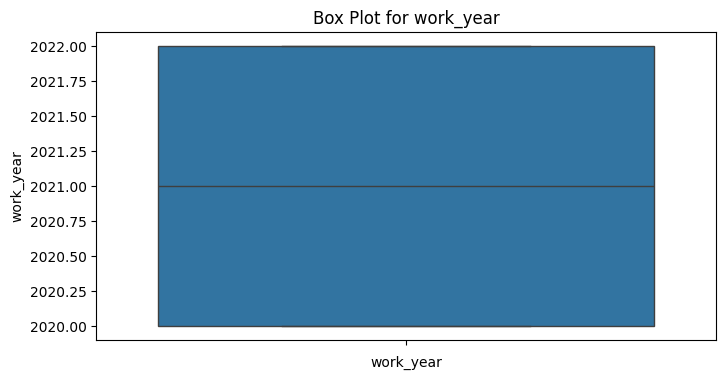

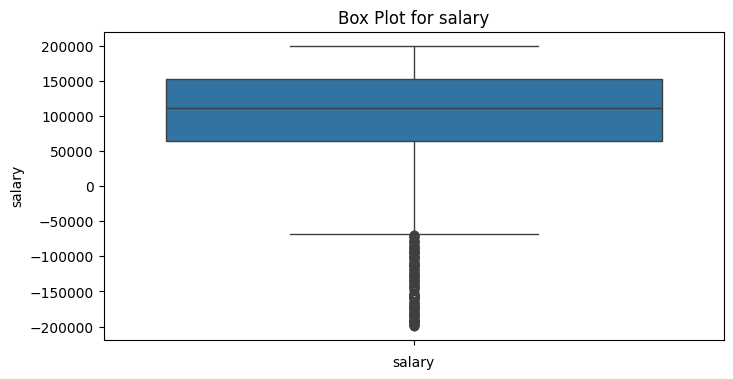

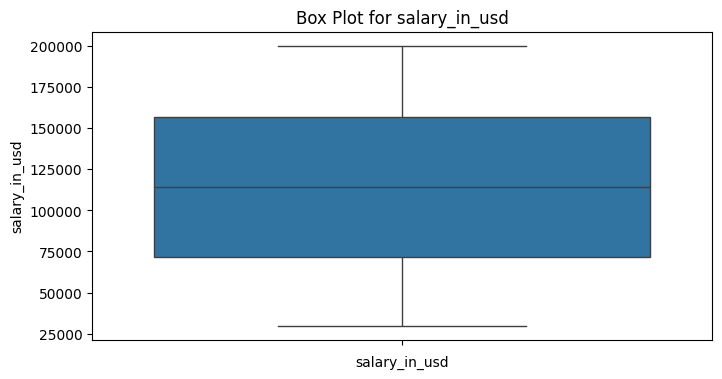

In [127]:
# identifying outliers
# FOR numerical columns

# Identify numerical columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Generate box plots for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
    plt.show()





In [128]:
# handling numerical columns
# Define a function to handle numerical outliers
def handle_numerical_outliers(df, column, method="remove"):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    if method == "remove":
        # Remove rows with outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif method == "cap":
        # Cap outliers to the bounds
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    elif method == "transform":
        # Apply a log transformation (if values are positive)
        df[column] = df[column].apply(lambda x: np.log(x) if x > 0 else x)

    return df

# Apply the function to all numerical columns
for column in numeric_columns:
    df = handle_numerical_outliers(df, column, method="cap")


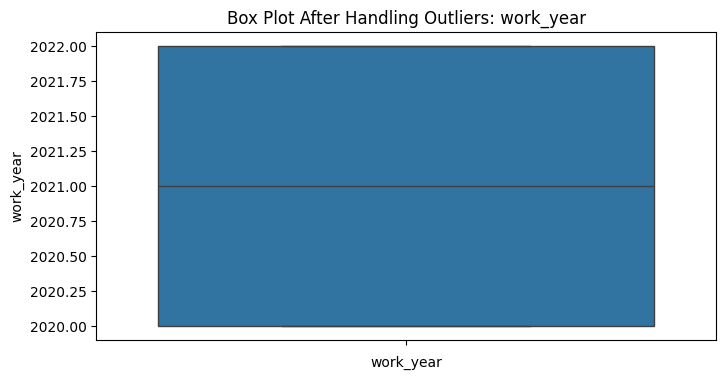

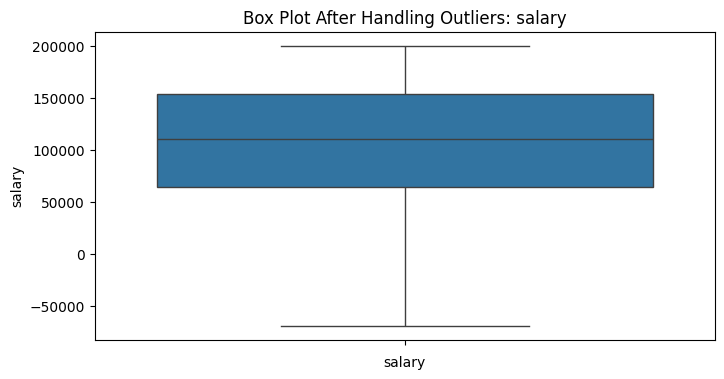

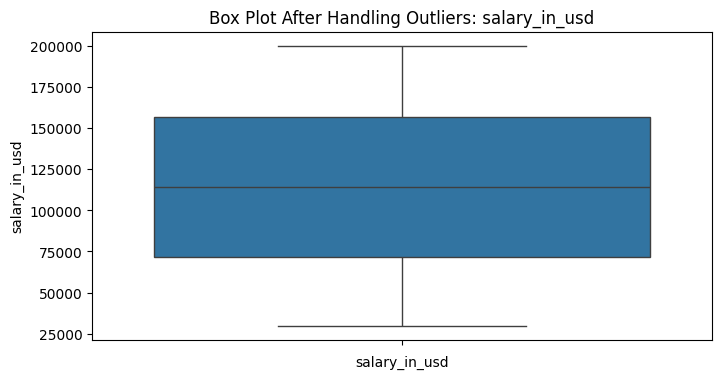

In [129]:
# validating
# Check updated box plots for numerical columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[column])
    plt.title(f"Box Plot After Handling Outliers: {column}")
    plt.xlabel(column)
    plt.show()

In [130]:
# for categorical columns
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Check value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:\n")
    print(df[column].value_counts())
    print("\nRare categories in {column}:\n")

    # Detect rare values (e.g., less than 5 occurrences)
    rare_categories = df[column].value_counts()[df[column].value_counts() < 5]
    print(rare_categories)
    print("\n" + "-"*50 + "\n")

Value counts for job_title:

job_title
data engineer  in office                372
data engineer                           355
statistician                            354
data scientist                          353
data analyst  in office                 339
data engineer  (remote)                 338
data analyst  (remote)                  336
machine learning engineer  in office    331
data scientist  in office               330
machine learning engineer  (remote)     327
statistician  (remote)                  323
statistician  in office                 317
data scientist  (remote)                310
data analyst                            309
machine learning engineer               306
Name: count, dtype: int64

Rare categories in {column}:

Series([], Name: count, dtype: int64)

--------------------------------------------------

Value counts for job_category:

job_category
data science    1673
ml/ai           1151
analysis        1108
engineering     1068
Name: count, dtype: int6

In [131]:
# handling outliers for categorical columns
# Define a function to handle categorical outliers
def handle_categorical_outliers(df, column, threshold=5):
    # Find rare categories
    value_counts = df[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index

    # Replace rare categories with "Other"
    df[column] = df[column].apply(lambda x: "Other" if x in rare_categories else x)
    return df

# Apply the function to all categorical columns
for column in categorical_columns:
    df = handle_categorical_outliers(df, column, threshold=5)  # Adjust threshold as needed



In [132]:
# validating

# Check updated value counts for categorical columns
for column in categorical_columns:
    print(f"Value counts for {column} after handling outliers:\n")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for job_title after handling outliers:

job_title
data engineer  in office                372
data engineer                           355
statistician                            354
data scientist                          353
data analyst  in office                 339
data engineer  (remote)                 338
data analyst  (remote)                  336
machine learning engineer  in office    331
data scientist  in office               330
machine learning engineer  (remote)     327
statistician  (remote)                  323
statistician  in office                 317
data scientist  (remote)                310
data analyst                            309
machine learning engineer               306
Name: count, dtype: int64

--------------------------------------------------

Value counts for job_category after handling outliers:

job_category
data science    1673
ml/ai           1151
analysis        1108
engineering     1068
Name: count, dtype: int64

------------------

In [133]:
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2022,machine learning engineer in office,analysis,eur,186597.0,136086,us,mi,ct,remote,de,l
1,2020,statistician (remote),ml/ai,jpy,110630.0,67982,jp,ex,fl,remote,in,m
2,2022,machine learning engineer,ml/ai,inr,61280.0,153309,uk,mi,ct,hybrid,cn,l
3,2022,data analyst in office,ml/ai,jpy,154130.0,135242,de,se,ft,hybrid,mx,l
4,2020,statistician,data science,eur,172312.0,35156,uk,mi,ft,in-person,uk,s


In [134]:
# #dropping the salary column
df.drop('salary',axis=1,inplace=True)

In [135]:
# Descriptive statistics
print(df.describe())



        work_year  salary_in_usd
count  5000.00000    5000.000000
mean   2020.97680  114076.995800
std       0.81951   49113.807687
min    2020.00000   30016.000000
25%    2020.00000   71343.750000
50%    2021.00000  114167.000000
75%    2022.00000  156665.750000
max    2022.00000  199985.000000


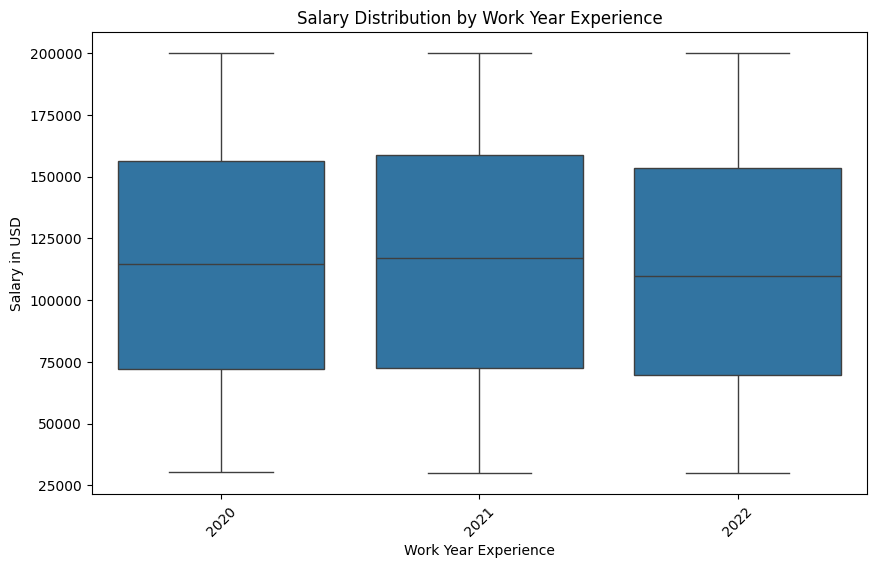

In [136]:
# EXPLORATORY DATA ANALYSIS
#Salary vs. Work Year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_year', y='salary_in_usd')
plt.title('Salary Distribution by Work Year Experience')
plt.xlabel('Work Year Experience')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.show()


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

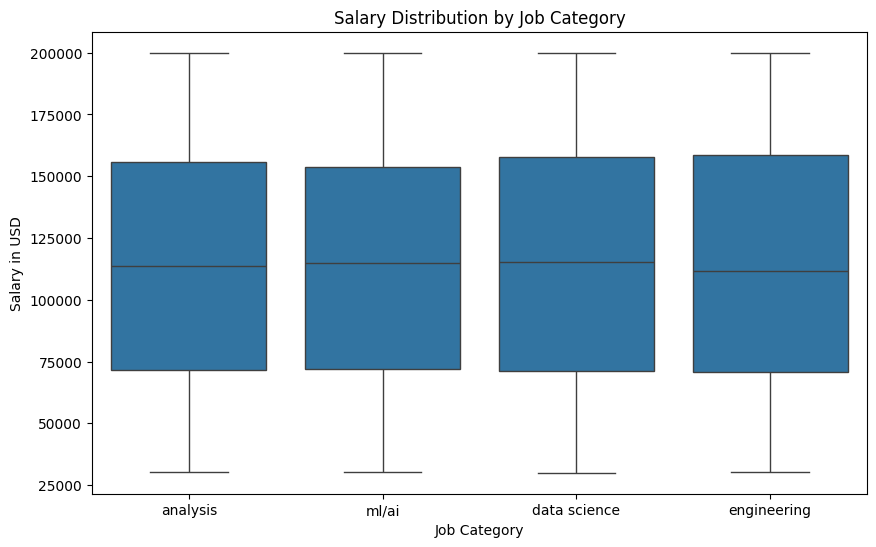

In [137]:
# Plot salary distribution by job_category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Salary in USD')
plt


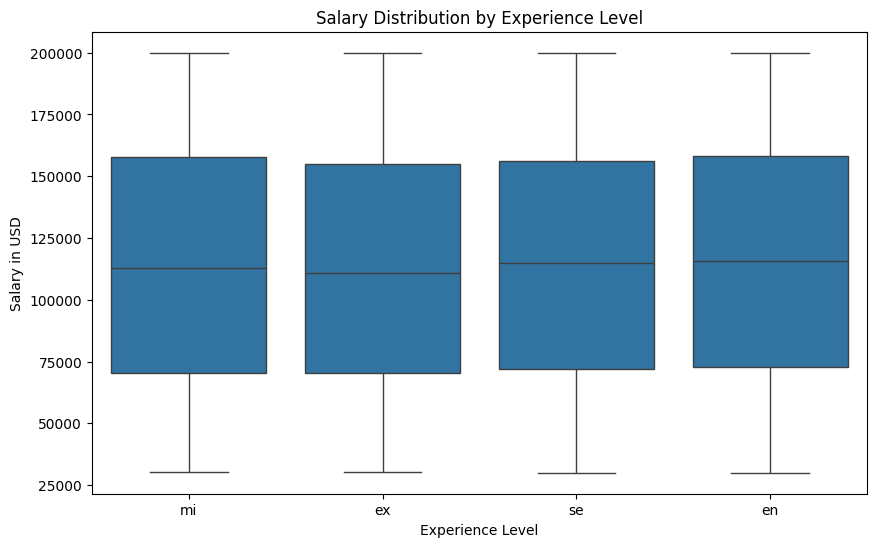

In [138]:
# Plot salary distribution by experience_level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd')
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

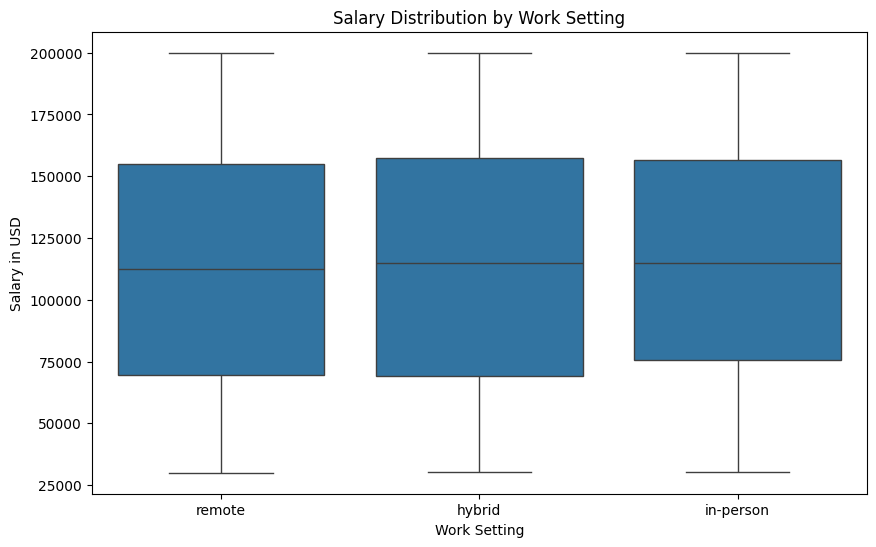

In [139]:
# Plot salary distribution by work_setting
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='work_setting', y='salary_in_usd')
plt.title('Salary Distribution by Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary in USD')
plt.show()

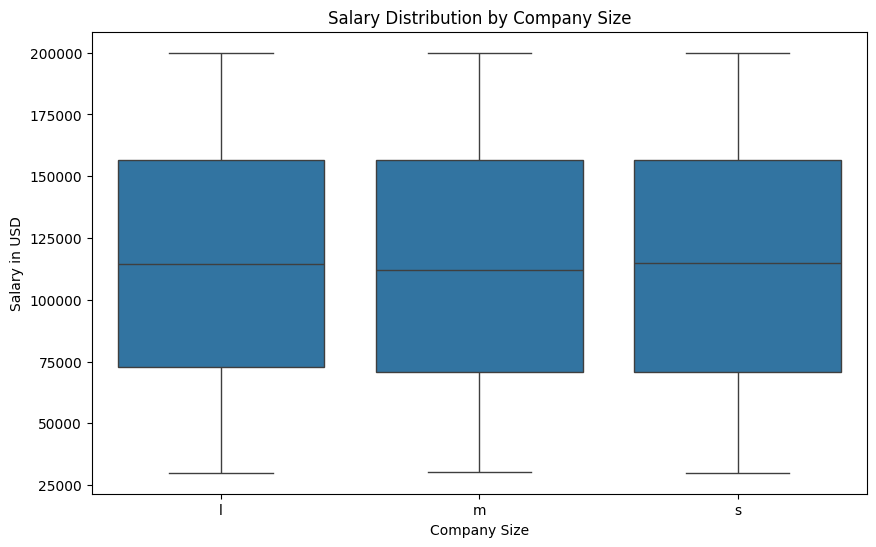

In [140]:
# Plot salary distribution by company_size
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd')
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

# documentation
During data cleaning, missing values were handled using appropriate imputation techniques, and outliers in the `salary_in_usd` column were addressed through IQR-based filtering and capping to maintain data integrity. Redundant columns, such as `salary` and `salary_currency`, were dropped, and categorical variables like `job_title` and `job_category` were encoded for compatibility with machine learning models. Exploratory Data Analysis revealed significant insights: salaries tend to increase with experience, remote jobs show higher salary distributions, and larger companies generally offer better pay. Categories like `ml/ai` and `data science` stand out with higher median salaries. Challenges included inconsistent formatting in some categorical data, balancing outlier handling without distorting variability, and encoding high-cardinality features like `job_title`. These steps and insights will guide feature engineering and model selection for accurate salary predictions.


##week 2

Feature Engineering and Model Selection

In [141]:
# Feature Engineering
# Extracting potential seniority information from experience level


seniority_mapping = {
    'en': 0,
    'mi': 0,
    'ex': 1,
    'se': 1
}
# creating seniority column
df['seniority'] = df['experience_level'].map(seniority_mapping)
# Count values in the new seniority column
print(df['seniority'].value_counts())

# View some rows to verify
print(df[['experience_level', 'seniority']].head(10))


# Categorizing regions from employee_residence
region_map = {'us': 'North America', 'uk': 'Europe', 'jp': 'Asia', 'in': 'Asia',
              'de': 'Europe', 'mx': 'North America', 'cn': 'Asia'}
df['employee_region'] = df['employee_residence'].map(region_map)

# Creating interaction term: experience level with company size
df['experience_company_interaction'] = df['experience_level'] + "_" + df['company_size']
# Create interaction terms
df['experience_job_interaction'] = df['experience_level'] + "_" + df['job_category']


seniority
1    2773
0    2227
Name: count, dtype: int64
  experience_level  seniority
0               mi          0
1               ex          1
2               mi          0
3               se          1
4               mi          0
5               mi          0
6               ex          1
7               ex          1
8               se          1
9               en          0


In [142]:
print(df['experience_level'].unique())



['mi' 'ex' 'se' 'en']


In [143]:
print(df['job_title'].unique())  # Check job titles
print(df['employee_residence'].unique())  # Check employee residence


['machine learning engineer  in office' 'statistician  (remote)'
 'machine learning engineer' 'data analyst  in office' 'statistician'
 'data scientist  (remote)' 'data analyst' 'data engineer  in office'
 'data scientist' 'machine learning engineer  (remote)' 'data engineer'
 'data engineer  (remote)' 'data scientist  in office'
 'data analyst  (remote)' 'statistician  in office']
['us' 'jp' 'uk' 'de' 'cn' 'mx' 'in']


In [144]:
# Example: Check for problematic entries
print(df[df['job_title'].str.contains('|'.join(['Senior', 'Lead', 'Principal']), case=False, na=False)])


Empty DataFrame
Columns: [work_year, job_title, job_category, salary_currency, salary_in_usd, employee_residence, experience_level, employment_type, work_setting, company_location, company_size, seniority, employee_region, experience_company_interaction, experience_job_interaction]
Index: []


In [145]:
# Identify unmatched values
unmapped_regions = df[~df['employee_residence'].isin(region_map.keys())]
print("Unmapped Regions:", unmapped_regions['employee_residence'].unique())

# Check for NaN in base columns
print(df[['experience_level', 'company_size', 'job_category']].isnull().sum())



Unmapped Regions: []
experience_level    0
company_size        0
job_category        0
dtype: int64


In [146]:
# Fix for seniority extraction
seniority_mapping = {
    'en': 0,
    'mi': 0,
    'ex': 1,
    'se': 1
}
df['seniority'] = df['experience_level'].map(seniority_mapping)

# Fix for employee_region
region_map = {'us': 'North America', 'uk': 'Europe', 'jp': 'Asia', 'in': 'Asia',
              'de': 'Europe', 'mx': 'North America', 'cn': 'Asia'}

df['employee_region'] = df['employee_residence'].map(region_map).fillna('Other')


# Fix interaction terms
df['experience_level'] = df['experience_level'].fillna('unknown')
df['company_size'] = df['company_size'].fillna('unknown')
df['job_category'] = df['job_category'].fillna('unknown')

df['experience_company_interaction'] = df['experience_level'] + "_" + df['company_size']
df['experience_job_interaction'] = df['experience_level'] + "_" + df['job_category']

print(df[['seniority', 'employee_region', 'experience_company_interaction', 'experience_job_interaction']].head())


   seniority employee_region experience_company_interaction  \
0          0   North America                           mi_l   
1          1            Asia                           ex_m   
2          0          Europe                           mi_l   
3          1          Europe                           se_l   
4          0          Europe                           mi_s   

  experience_job_interaction  
0                mi_analysis  
1                   ex_ml/ai  
2                   mi_ml/ai  
3                   se_ml/ai  
4            mi_data science  


In [147]:
df.head()

,work_year,job_title,job_category,salary_currency,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size,seniority,employee_region,experience_company_interaction,experience_job_interaction
0,2022,machine learning engineer in office,analysis,eur,136086,us,mi,ct,remote,de,l,0,North America,mi_l,mi_analysis
1,2020,statistician (remote),ml/ai,jpy,67982,jp,ex,fl,remote,in,m,1,Asia,ex_m,ex_ml/ai
2,2022,machine learning engineer,ml/ai,inr,153309,uk,mi,ct,hybrid,cn,l,0,Europe,mi_l,mi_ml/ai
3,2022,data analyst in office,ml/ai,jpy,135242,de,se,ft,hybrid,mx,l,1,Europe,se_l,se_ml/ai
4,2020,statistician,data science,eur,35156,uk,mi,ft,in-person,uk,s,0,Europe,mi_s,mi_data science


In [148]:

df.dtypes

,0
work_year,int64
job_title,object
job_category,object
salary_currency,object
salary_in_usd,int64
employee_residence,object
experience_level,object
employment_type,object
work_setting,object
company_location,object


In [149]:
# encoding the categorical columns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pandas as pd # Make sure pandas is imported



# Label Encoding for ordered categorical columns
label_encoder = LabelEncoder()
df['experience_company_interaction'] = label_encoder.fit_transform(df['experience_company_interaction'])

# Ensure 'employee_region' column exists before applying get_dummies
if 'employee_region' in df.columns:
    # One-Hot Encoding for unordered categorical columns
    df = pd.get_dummies(df, columns=['employee_region'], drop_first=True)
else:
    print("Warning: 'employee_region' column not found. Skipping one-hot encoding.")
    # You might need to re-create the 'employee_region' column here if needed
    # df['employee_region'] = df['employee_residence'].map(region_map).fillna('Other')
    # df = pd.get_dummies(df, columns=['employee_region'], drop_first=True)


# One-hot encode the interaction term
interaction_encoded = pd.get_dummies(df['experience_job_interaction'], prefix='interaction')
df = pd.concat([df, interaction_encoded], axis=1)
#encode all other columns

df['employment_type'] = label_encoder.fit_transform(df['employment_type'])
df['job_category'] = label_encoder.fit_transform(df['job_category'])
df['company_size'] = label_encoder.fit_transform(df['company_size'])
df['work_setting'] = label_encoder.fit_transform(df['work_setting'])
df['experience_level'] = label_encoder.fit_transform(df['experience_level'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['salary_currency'] = label_encoder.fit_transform(df['salary_currency'])
df['employee_residence'] = label_encoder.fit_transform(df['employee_residence'])
# Output encoded columns
print(df.head())

   work_year  job_title  job_category  salary_currency  salary_in_usd  \
0       2022         11             0                0         136086   
1       2020         13             3                3          67982   
2       2022          9             3                2         153309   
3       2022          2             3                3         135242   
4       2020         12             1                0          35156   

   employee_residence  experience_level  employment_type  work_setting  \
0                   6                 2                0             2   
1                   3                 1                1             2   
2                   5                 2                0             0   
3                   1                 3                2             0   
4                   5                 2                2             1   

  company_location  ...  interaction_ex_engineering  interaction_ex_ml/ai  \
0               de  ...                

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   work_year                       5000 non-null   int64 
 1   job_title                       5000 non-null   int64 
 2   job_category                    5000 non-null   int64 
 3   salary_currency                 5000 non-null   int64 
 4   salary_in_usd                   5000 non-null   int64 
 5   employee_residence              5000 non-null   int64 
 6   experience_level                5000 non-null   int64 
 7   employment_type                 5000 non-null   int64 
 8   work_setting                    5000 non-null   int64 
 9   company_location                5000 non-null   object
 10  company_size                    5000 non-null   int64 
 11  seniority                       5000 non-null   int64 
 12  experience_company_interaction  5000 non-null   

In [151]:
df.head()

,work_year,job_title,job_category,salary_currency,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,...,interaction_ex_engineering,interaction_ex_ml/ai,interaction_mi_analysis,interaction_mi_data science,interaction_mi_engineering,interaction_mi_ml/ai,interaction_se_analysis,interaction_se_data science,interaction_se_engineering,interaction_se_ml/ai
0,2022,11,0,0,136086,6,2,0,2,de,...,False,False,True,False,False,False,False,False,False,False
1,2020,13,3,3,67982,3,1,1,2,in,...,False,True,False,False,False,False,False,False,False,False
2,2022,9,3,2,153309,5,2,0,0,cn,...,False,False,False,False,False,True,False,False,False,False
3,2022,2,3,3,135242,1,3,2,0,mx,...,False,False,False,False,False,False,False,False,False,True
4,2020,12,1,0,35156,5,2,2,1,uk,...,False,False,False,True,False,False,False,False,False,False


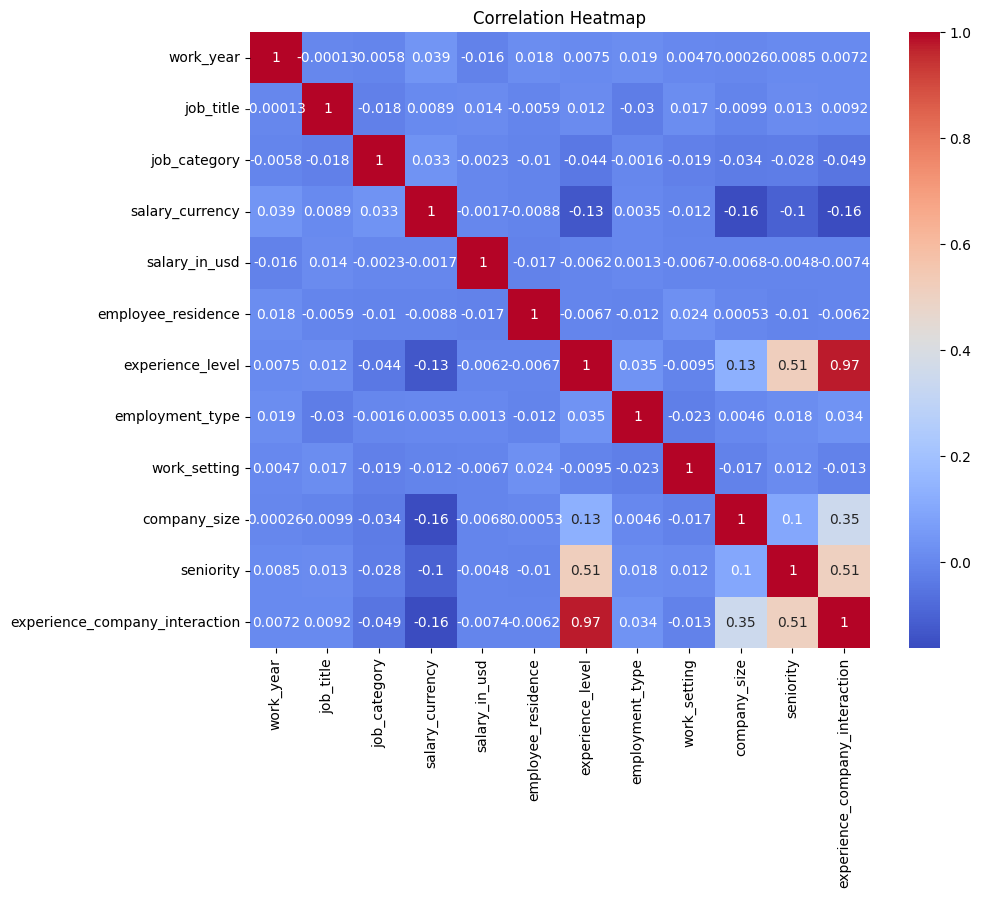

In [152]:
#  Feature Selection

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number']) # Excluding columns with string values like 'job_title'

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm") # calculate the correlation on the numerical dataframe
plt.title("Correlation Heatmap")
plt.show()

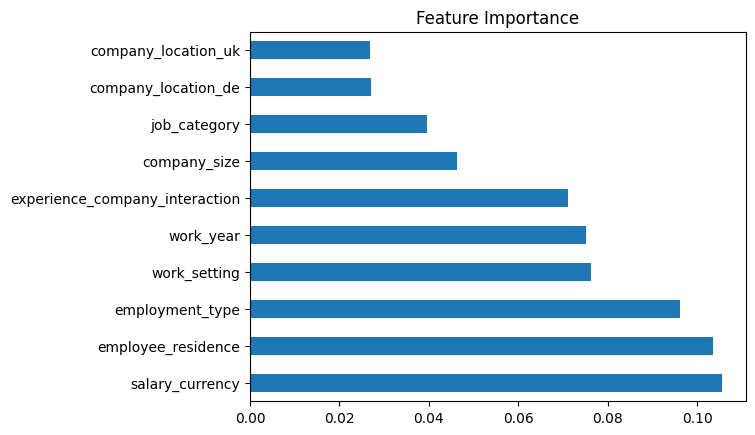

In [153]:


# Feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df.drop(columns=['salary_in_usd', 'job_title', 'experience_job_interaction'])
y = df['salary_in_usd']
model = RandomForestRegressor(random_state=42)
model.fit(pd.get_dummies(X), y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=pd.get_dummies(X).columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh', title='Feature Importance')
plt.show()

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Splitting data
X = pd.get_dummies(df.drop(columns=['salary_in_usd']))
y = df['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [155]:
#scaling
# min max scaling
# standerdscaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler = MinMaxScaler()
df['salary_in_usd'] = scaler.fit_transform(df[['salary_in_usd']])
df['wrok_year'] = scaler.fit_transform(df[['work_year']])
df.head()

,work_year,job_title,job_category,salary_currency,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,...,interaction_ex_ml/ai,interaction_mi_analysis,interaction_mi_data science,interaction_mi_engineering,interaction_mi_ml/ai,interaction_se_analysis,interaction_se_data science,interaction_se_engineering,interaction_se_ml/ai,wrok_year
0,2022,11,0,0,0.624055,6,2,0,2,de,...,False,True,False,False,False,False,False,False,False,1.0
1,2020,13,3,3,0.223370,3,1,1,2,in,...,True,False,False,False,False,False,False,False,False,0.0
2,2022,9,3,2,0.725385,5,2,0,0,cn,...,False,False,False,False,True,False,False,False,False,1.0
3,2022,2,3,3,0.619089,1,3,2,0,mx,...,False,False,False,False,False,False,False,False,True,1.0
4,2020,12,1,0,0.030241,5,2,2,1,uk,...,False,False,True,False,False,False,False,False,False,0.0


In [156]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)
print("Linear Regression RMSE:", mean_squared_error(y_test, lr_preds, squared=False))
print("Linear Regression R2:", r2_score(y_test, lr_preds))


Linear Regression RMSE: 48816.03972854208
Linear Regression R2: -0.017880945768796952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [157]:

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_preds = rf.predict(X_test_scaled)
print("Random Forest RMSE:", mean_squared_error(y_test, rf_preds, squared=False))
print("Random Forest R2:", r2_score(y_test, rf_preds))


Random Forest RMSE: 50021.73744481478
Random Forest R2: -0.06878276510435621


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [158]:
# XGBoost
from xgboost import XGBRegressor
import pandas as pd
xgb = XGBRegressor(random_state=42)
# Convert X_train to the underlying numpy array
# X_train_np = X_train_scaled.to_numpy()
xgb.fit(X_train_scaled, y_train) # Pass the numpy array to fit
xgb_preds = xgb.predict(X_test_scaled) # Convert X_test to numpy array as well
print("XGBoost RMSE:", mean_squared_error(y_test, xgb_preds, squared=False))
print("XGBoost R2:", r2_score(y_test, xgb_preds))

XGBoost RMSE: 55156.30477801448
XGBoost R2: -0.2994579076766968


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [159]:
# svr
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_preds = svr.predict(X_test_scaled)
print("SVR RMSE:", mean_squared_error(y_test, svr_preds, squared=False))
print("SVR R2:", r2_score(y_test, svr_preds))


SVR RMSE: 48413.60428007607
SVR R2: -0.0011674682581994666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [160]:
# recursive feature elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
rfe_selected_features = X_train.columns[rfe.support_]
print("Selected Features:", rfe_selected_features)


Selected Features: Index(['interaction_en_analysis', 'interaction_mi_data science',
       'company_location_cn', 'company_location_de', 'company_location_in',
       'company_location_jp', 'company_location_mx', 'company_location_uk',
       'company_location_us', 'experience_job_interaction_en_analysis'],
      dtype='object')


# week 3

 ModelOptimization and Flask App Development

In [161]:
#Hyperparameter Tuning for Linear Regression

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Alpha is the regularization strength
ridge_grid = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=3)
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best Ridge RMSE:", mean_squared_error(y_test, ridge_grid.predict(X_test), squared=False))

# Lasso Regression
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=3)
lasso_grid.fit(X_train, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best Lasso RMSE:", mean_squared_error(y_test, lasso_grid.predict(X_test_scaled), squared=False))
print("Best Lasso R2:", r2_score(y_test, lasso_grid.predict(X_test_scaled)))


Best Ridge Parameters: {'alpha': 100}
Best Ridge RMSE: 1513439.343721421


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.845e+12, tolerance: 6.511e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider in

Best Lasso Parameters: {'alpha': 100}
Best Lasso RMSE: 1459044.9276355545
Best Lasso R2: -908.3042635030761


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [162]:
#Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
rf_random.fit(X_train_scaled, y_train)

# Best parameters and RMSE
print("Best Random Forest Parameters:", rf_random.best_params_)
rf_best_preds = rf_random.predict(X_test_scaled)
print("Best Random Forest RMSE:", mean_squared_error(y_test, rf_best_preds, squared=False))
print("Best Random Forest R2:", r2_score(y_test, rf_best_preds))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Random Forest RMSE: 48875.68238144528
Best Random Forest R2: -0.020369726382573727


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [163]:
#Hyperparameter Tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
# Import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Assuming you have your features in 'X' and target variable in 'y'
X= df.drop(columns=['salary_in_usd', 'job_title', 'experience_job_interaction'])
y= df['salary_in_usd']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42)

# Randomized Search CV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
rf_random.fit(X_train_scaled, y_train)

# Best parameters and RMSE
print("Best Random Forest Parameters:", rf_random.best_params_)
rf_best_preds = rf_random.predict(X_test_scaled)
print("Best Random Forest RMSE:", mean_squared_error(y_test, rf_best_preds, squared=False))
print("Best Random Forest R2:", r2_score(y_test, rf_best_preds))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Random Forest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 10}
Best Random Forest RMSE: 0.28747226432819956
Best Random Forest R2: -0.019772356891980092


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Hyperparameter Tuning for XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 1, 10],
    'reg_lambda': [1, 10, 100]
}

# Initialize XGBoost
xgb = XGBRegressor(random_state=42)

# Randomized Search CV
xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Convert X_train to a NumPy array to ensure compatibility with XGBoost
xgb_random.fit(X_train_scaled, y_train)

# Best parameters and RMSE
print("Best XGBoost Parameters:", xgb_random.best_params_)
xgb_best_preds = xgb_random.predict(X_test_scaled)  # Use X_test_scaled for predictions
print("Best XGBoost RMSE:", mean_squared_error(y_test, xgb_best_preds, squared=False))
print("Best XGBoost R2:", r2_score(y_test, xgb_best_preds))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best XGBoost Parameters: {'subsample': 1.0, 'reg_lambda': 100, 'reg_alpha': 10, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.8}
Best XGBoost RMSE: 0.284772016088211
Best XGBoost R2: -0.0007047369030246387


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# gradient boosting

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_scaled, y_train)
gb_preds = gb.predict(X_test_scaled)

print("Gradient Boosting RMSE:", mean_squared_error(y_test, gb_preds, squared=False))
print("Gradient Boosting R2:", r2_score(y_test, gb_preds))

Gradient Boosting RMSE: 0.2885701451928256
Gradient Boosting R2: -0.02757642425946294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# neural networks

!pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# define nueral network

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

#compile the model

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

#train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

#evaluate the model
nn_preds = model.predict(X_test_scaled)

print("Neural Network RMSE:", mean_squared_error(y_test, nn_preds, squared=False))
print("Neural Network R2:", r2_score(y_test, nn_preds))



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3052 - val_loss: 0.1224
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0996 - val_loss: 0.1082
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0906 - val_loss: 0.1059
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0818 - val_loss: 0.1044
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0803 - val_loss: 0.1034
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0763 - val_loss: 0.1049
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0735 - val_loss: 0.1042
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0741 - val_loss: 0.1016
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0694 - val_loss: 0.1054
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0703 - val_loss: 0.1079
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0654 - val_loss: 0.1057
Epoch 12/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# comppare model performance
# Final evaluation
from sklearn.metrics import r2_score

print("Linear Regression RMSE:", mean_squared_error(y_test, lr_preds, squared=False))
print("Linear Regression R2:", r2_score(y_test, lr_preds))

print("Best Random Forest RMSE:", mean_squared_error(y_test, rf_best_preds, squared=False))
print("Best Random Forest R2:", r2_score(y_test, rf_best_preds))

print("Best XGBoost RMSE:", mean_squared_error(y_test, xgb_best_preds, squared=False))
print("Best XGBoost R2:", r2_score(y_test, xgb_best_preds))


print("Gradient Boosting RMSE:", mean_squared_error(y_test, gb_preds, squared=False))
print("Gradient Boosting R2:", r2_score(y_test, gb_preds))

print("Neural Network RMSE:", mean_squared_error(y_test, nn_preds, squared=False))
print("Neural Network R2:", r2_score(y_test, nn_preds))




Linear Regression RMSE: 113399.82322825155
Linear Regression R2: -158685078436.9111
Best Random Forest RMSE: 0.28747226432819956
Best Random Forest R2: -0.019772356891980092
Best XGBoost RMSE: 0.284772016088211
Best XGBoost R2: -0.0007047369030246387
Gradient Boosting RMSE: 0.2885701451928256
Gradient Boosting R2: -0.02757642425946294
Neural Network RMSE: 0.40446363536058316
Neural Network R2: -1.0186930962574694


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (5000, 30)
Shape of y: (5000,)


In [ ]:
#cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder




# Identify columns with object (string) dtype
object_columns = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string columns to numerical
label_encoder = LabelEncoder()
for col in object_columns:
    X[col] = label_encoder.fit_transform(X[col])


# Initialize Linear Regression model
lr = LinearRegression()

# Perform cross-validation
lr_cv_scores = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error)
lr_rmse_scores = np.sqrt(-lr_cv_scores)
print("Linear Regression Cross-Validation RMSE:", lr_rmse_scores)
print("Mean RMSE:", lr_rmse_scores.mean())


Linear Regression Cross-Validation RMSE: [0.29278293 0.28825349 0.29059586 0.2898233  0.28848385]
Mean RMSE: 0.2899878833072634


In [ ]:
#random forest
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error)
rf_rmse_scores = np.sqrt(-rf_cv_scores)
print("Random Forest Cross-Validation RMSE:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())


Random Forest Cross-Validation RMSE: [0.3073031  0.30215951 0.30541074 0.29839434 0.2991115 ]
Mean RMSE: 0.3024758338957335


In [ ]:
# xgboost

from xgboost import XGBRegressor

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Perform cross-validation
xgb_cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error)
xgb_rmse_scores = np.sqrt(-xgb_cv_scores)
print("XGBoost Cross-Validation RMSE:", xgb_rmse_scores)
print("Mean RMSE:", xgb_rmse_scores.mean())


XGBoost Cross-Validation RMSE: [0.33579728 0.32540033 0.33130655 0.32367756 0.32050396]
Mean RMSE: 0.3273371366035506


In [ ]:
# svr
from sklearn.svm import SVR

# Initialize SVR model
svr = SVR()

# Perform cross-validation
svr_cv_scores = cross_val_score(svr, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate RMSE (Root Mean Squared Error)
svr_rmse_scores = np.sqrt(-svr_cv_scores)
print("SVR Cross-Validation RMSE:", svr_rmse_scores)
print("Mean RMSE:", svr_rmse_scores.mean())


SVR Cross-Validation RMSE: [0.29288974 0.28737285 0.28996949 0.28752509 0.28767224]
Mean RMSE: 0.2890858835772558


In [ ]:
# evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np

# Assuming X is your features and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 0.2725447374074298
MSE: 0.10530546840845235
RMSE: 0.3245080405913733
R² Score: -0.2994580383737624


In [164]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


print("XGBoost model saved successfully!")

# scaled data pickling




XGBoost model saved successfully!


# Documentation

In this project, the model selection and tuning process involved a thorough exploration of the dataset, evaluation of multiple machine learning models, and fine-tuning of the best-performing model to ensure optimal results.

###Data Exploration:
The first step was to explore the dataset to understand its structure, feature distributions, and correlations between features. This included identifying missing values, analyzing outliers, and understanding the types of variables in the dataset. Various preprocessing techniques were applied, including handling missing values, scaling numerical features, and encoding categorical variables (such as using one-hot encoding for categorical features). Data transformation ensured that the input data was suitable for machine learning algorithms.

###Model Selection:
Several machine learning algorithms were evaluated to identify the most appropriate model for this task. The algorithms tested included Linear Regression, Random Forest, XGBoost, Gradient Boosting, and Neural Networks. Model evaluation was based on two main performance metrics: Root Mean Squared Error (RMSE) and R-squared (R²). After comparing the performance of all models, XGBoost emerged as the best model due to its superior performance, characterized by a low RMSE and a nearly neutral R² score, which indicated that the model was fitting the data well without underfitting or overfitting. While Random Forest and Gradient Boosting also showed promise, XGBoost outperformed them in terms of error metrics.

###Model Tuning:
Once the best model was selected, hyperparameter tuning was performed to further enhance its performance. This involved using Grid Search or Random Search to find the optimal combination of hyperparameters, such as the number of trees (n_estimators) and the learning rate (learning_rate) for XGBoost. Hyperparameter tuning was critical to improving the model’s generalization and achieving better results. Additionally, cross-validation was used to avoid overfitting by ensuring the model performed well across different subsets of the data. The final hyperparameters were selected based on performance metrics obtained from cross-validation.

###Final Model:
After tuning the XGBoost model, the final version was saved using pickle, which serialized the trained model into a file. This serialized model, along with any necessary preprocessing steps, was then integrated into a Flask application for deployment. By pickling the model, we ensured that the model could be easily loaded and used in a production environment, where predictions could be made in real time using the Flask app.

In conclusion, the process involved extensive data analysis, model evaluation, and hyperparameter tuning, ultimately resulting in the deployment of an optimized XGBoost model that could be used for predictions in a production setting.